# Dataset *heart_failure_clinical_records*

## Data Sparsity

<Figure size 600x450 with 0 Axes>

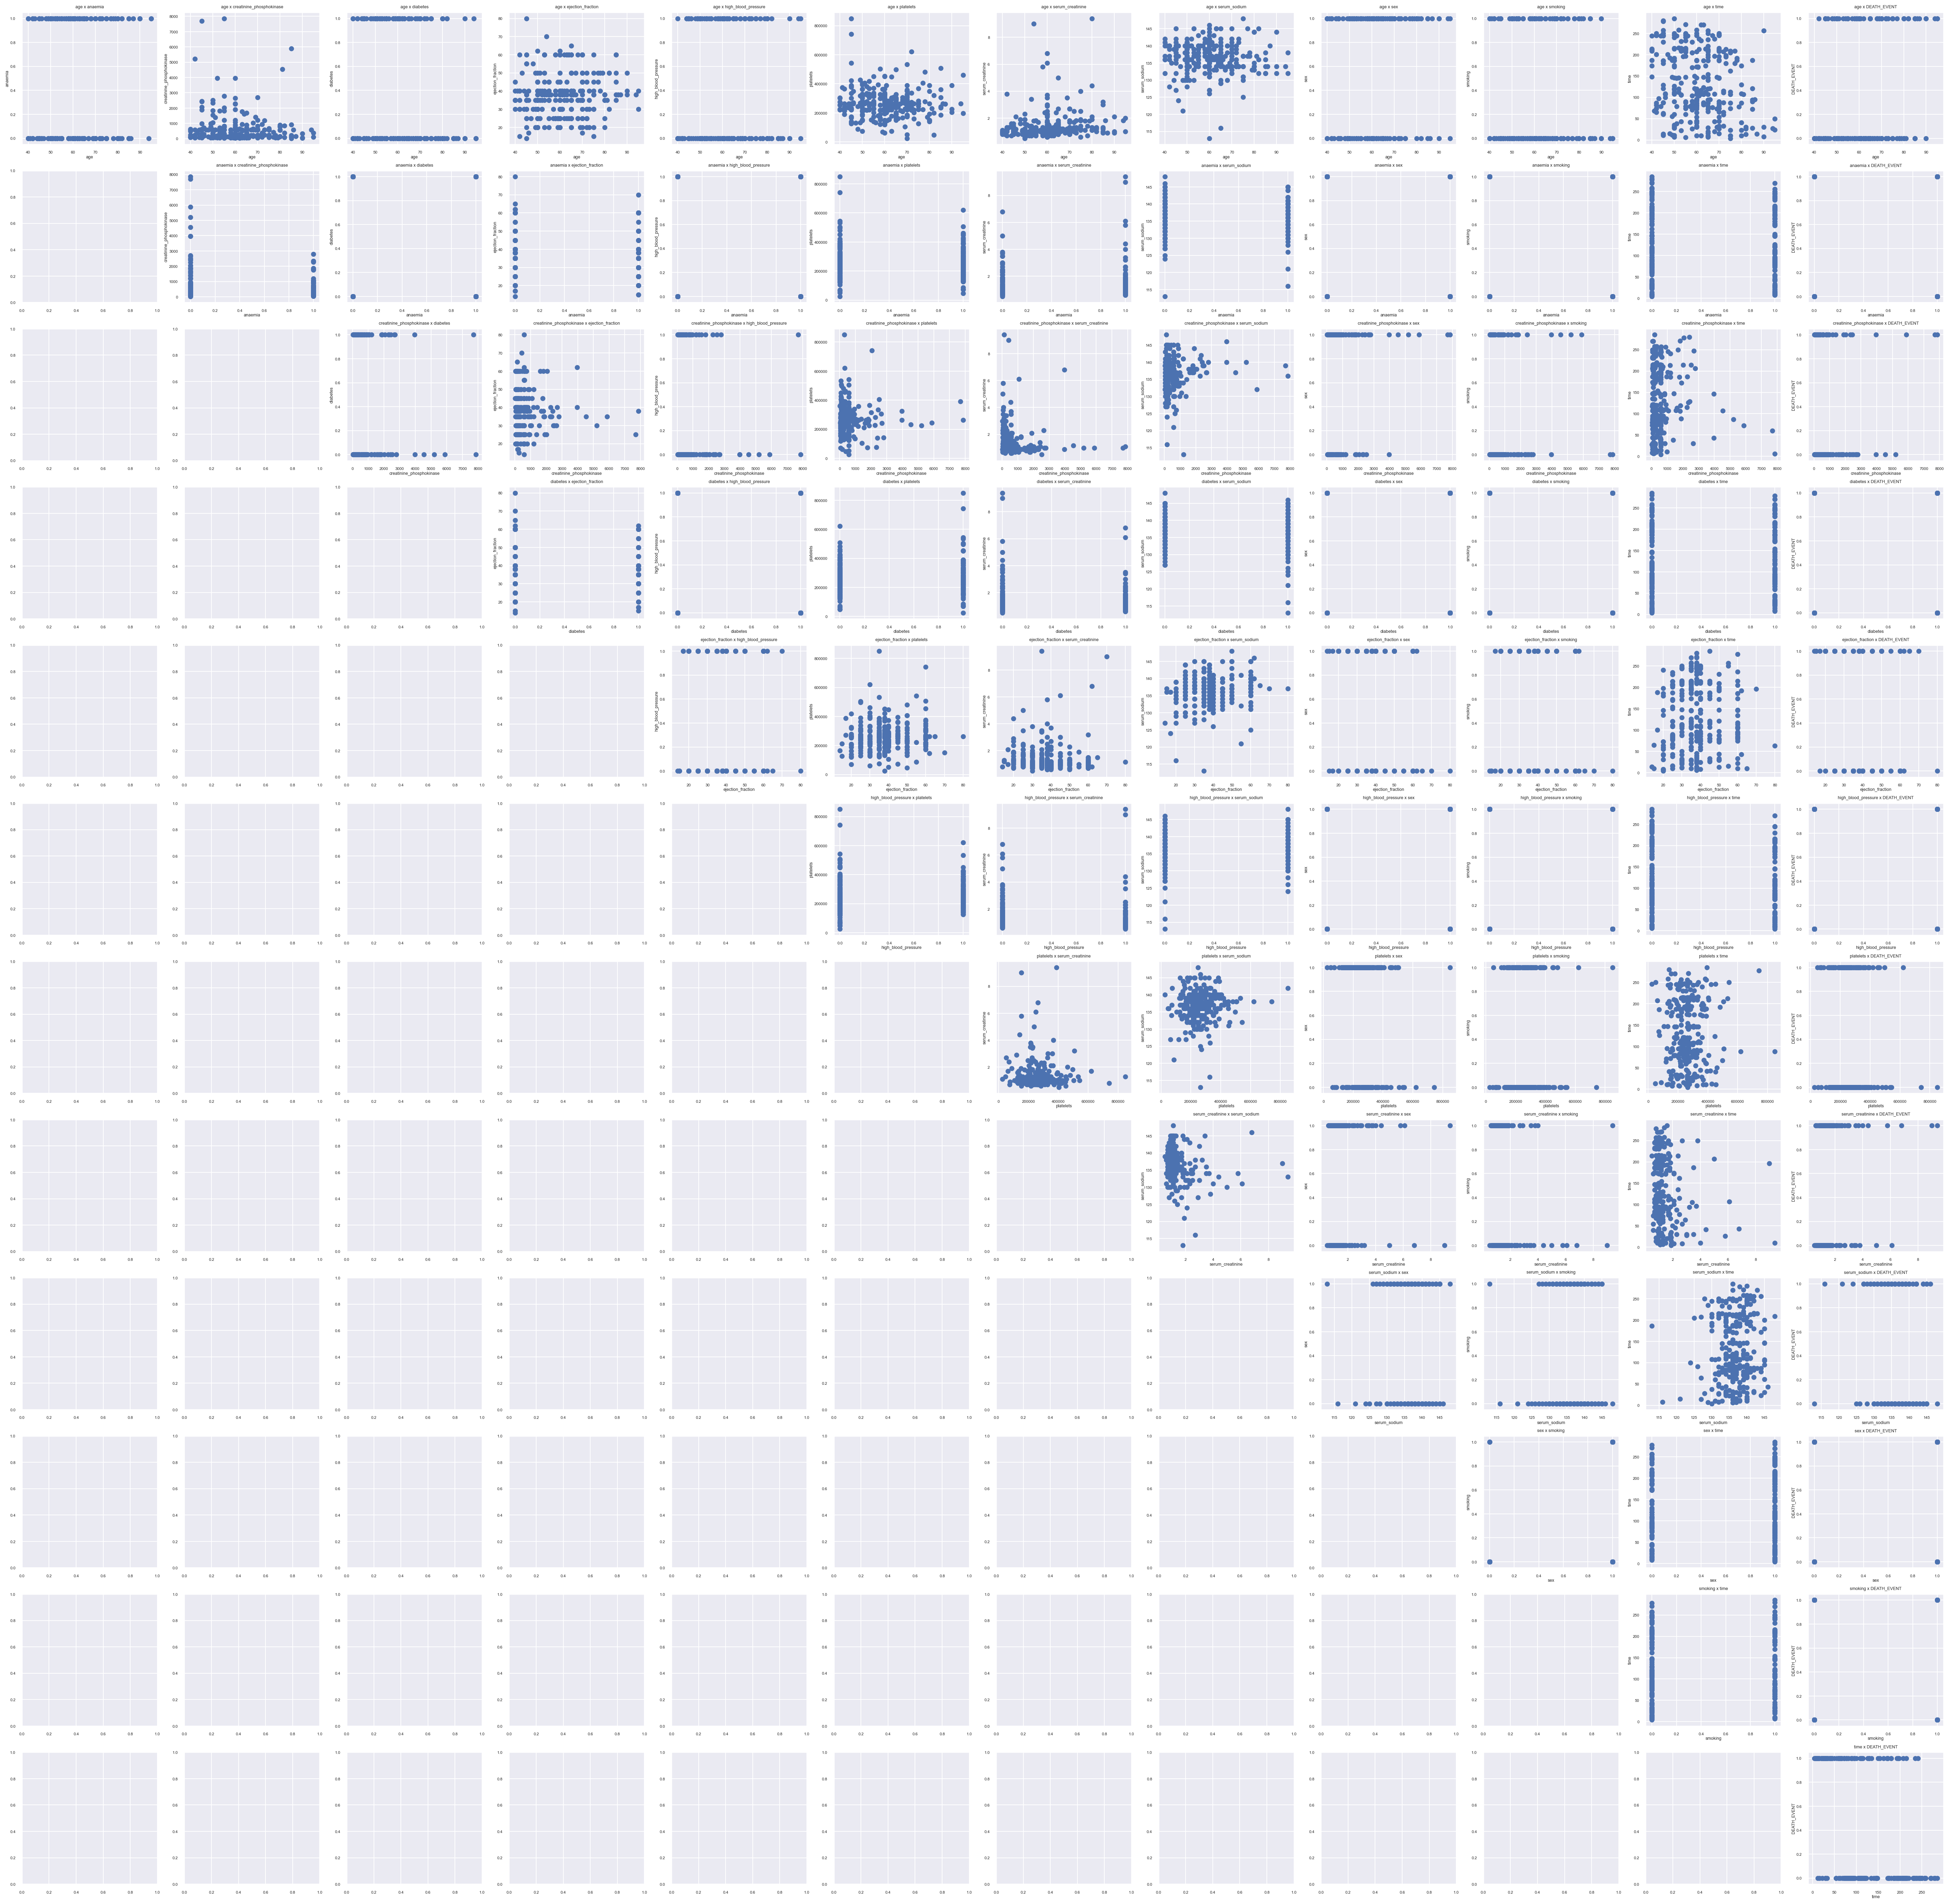

In [29]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
import config as cfg
import pandas as pd

register_matplotlib_converters()
data = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv', parse_dates=True, infer_datetime_format=True)

columns = data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])

In [23]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [24]:
non_binary_data = data.drop(['anaemia','diabetes','high_blood_pressure','sex', 'smoking','DEATH_EVENT'], axis=1)
non_binary_data

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


<Figure size 600x450 with 0 Axes>

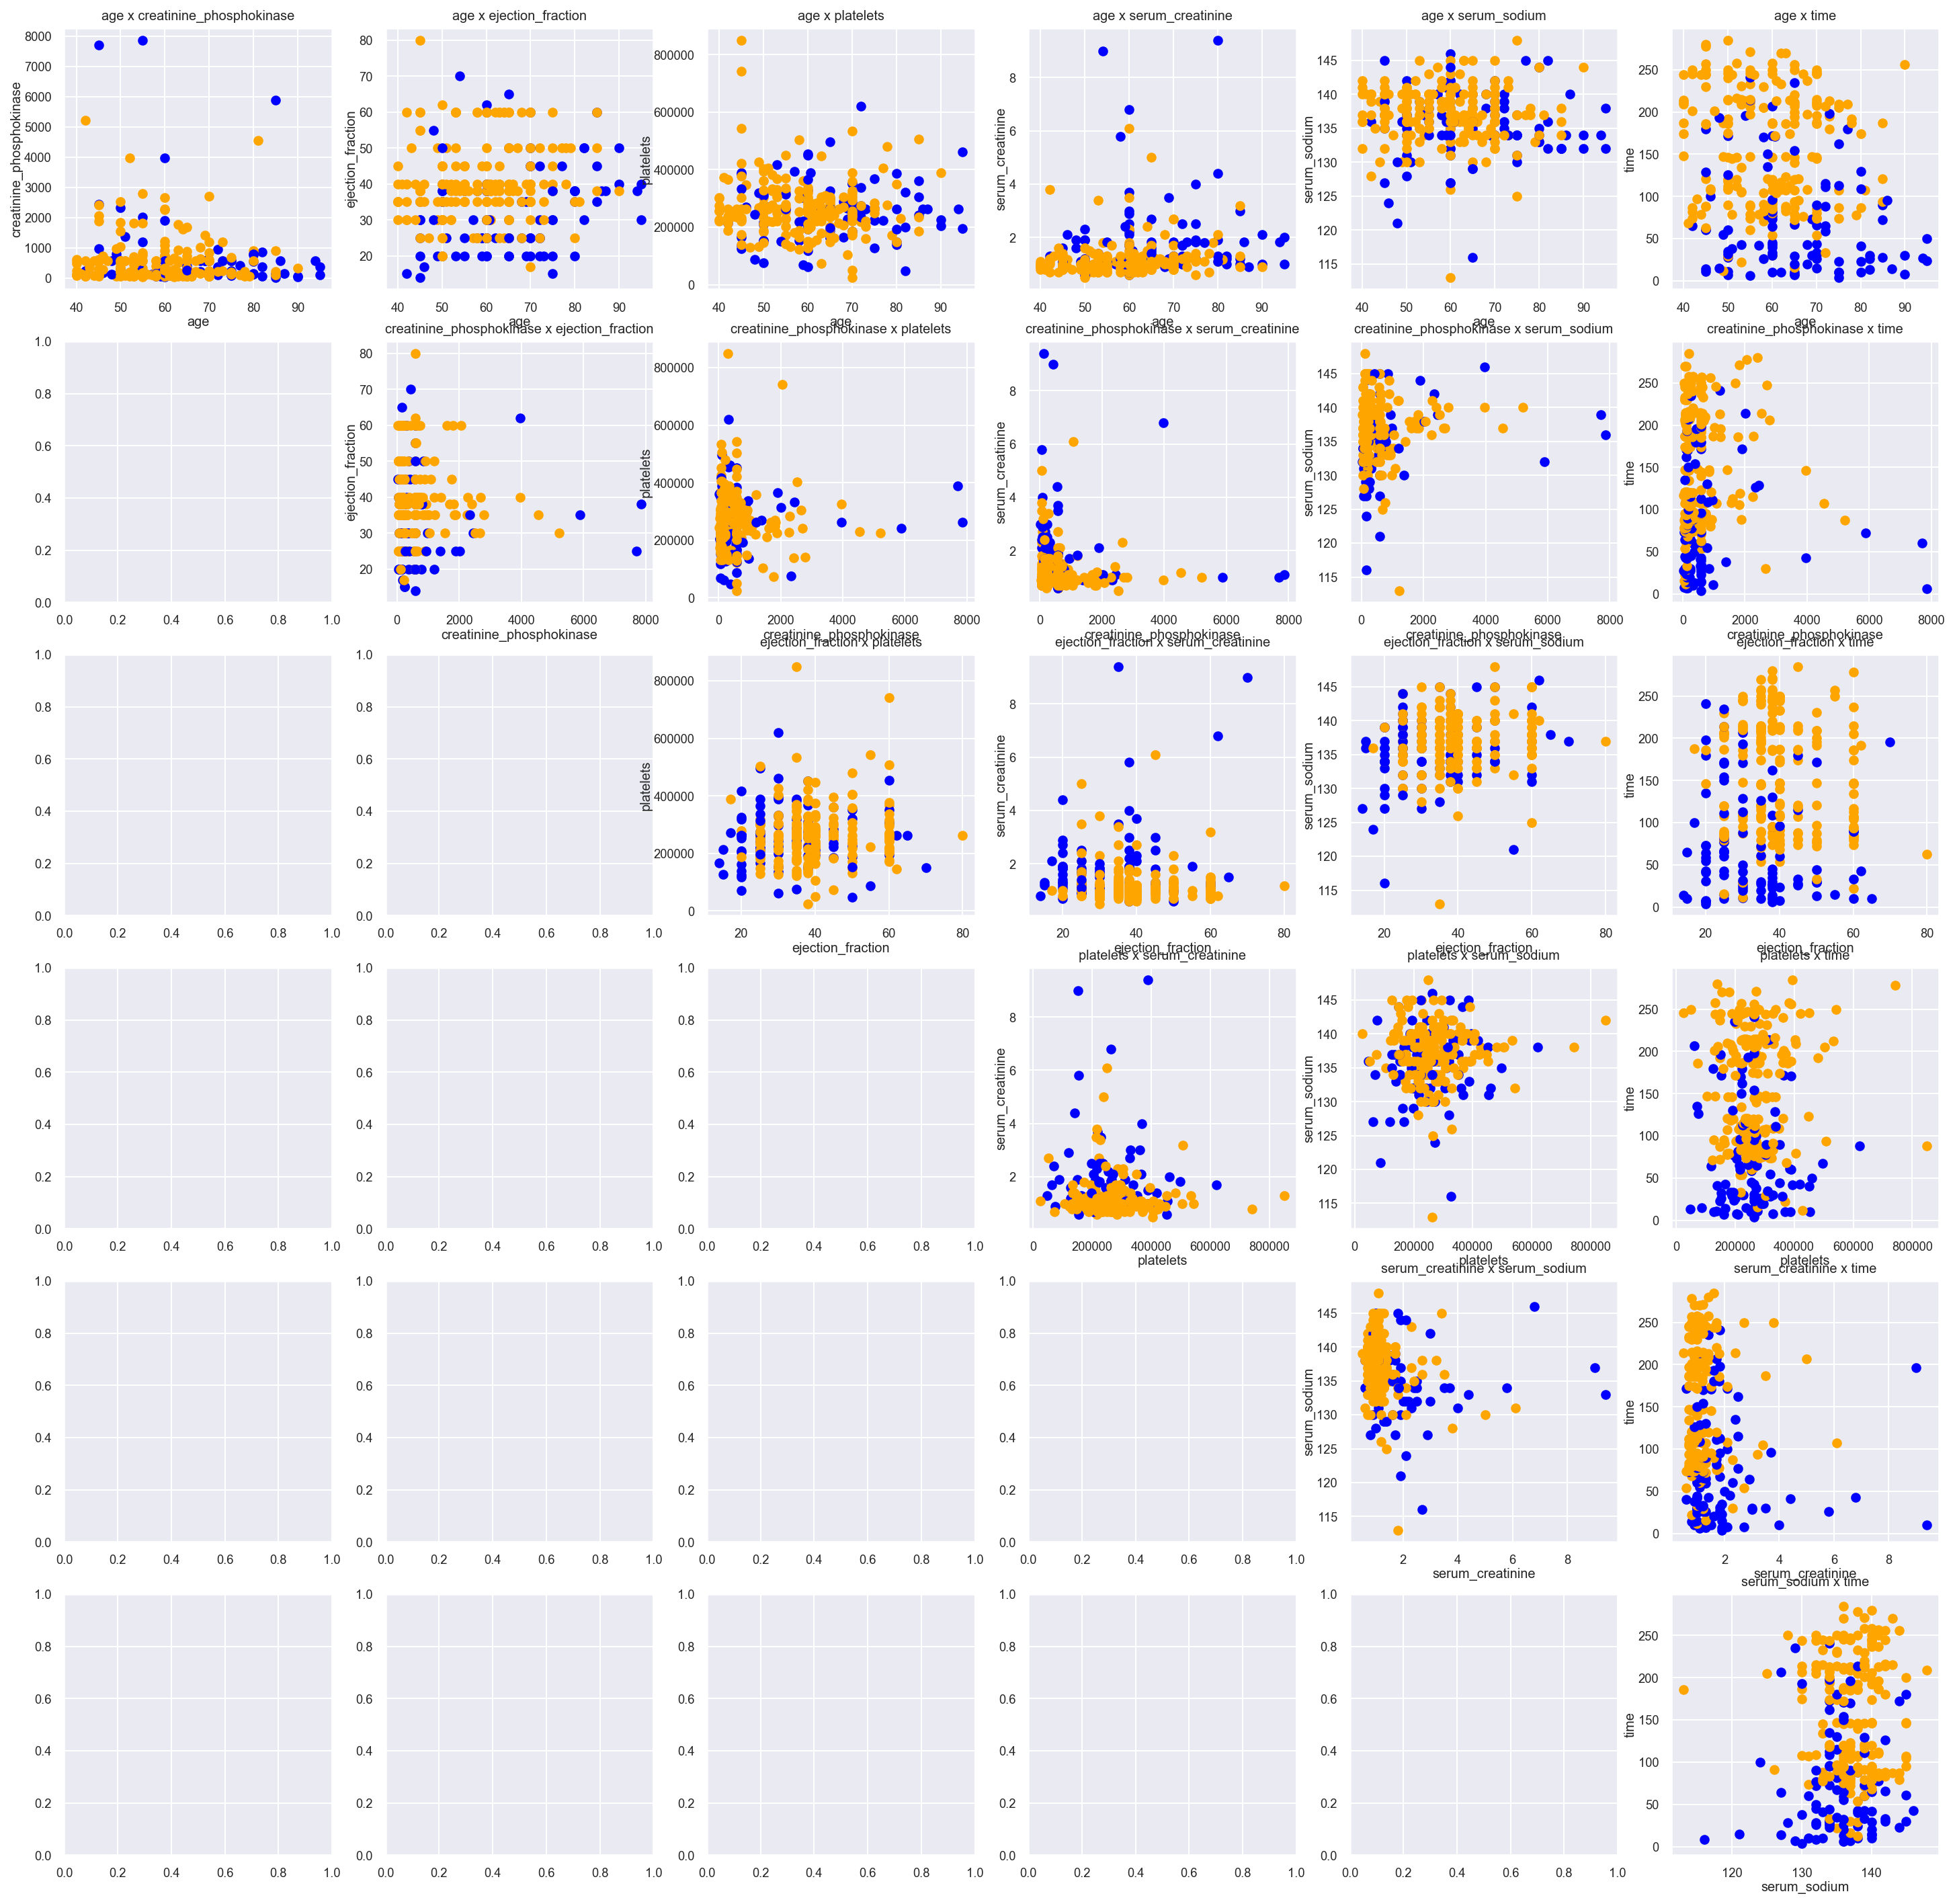

In [25]:
columns = non_binary_data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        
        r=data.iterrows()
        for index, row in r:
            axs[i, j-1].scatter(row[var1], row[var2], color=("orange", "blue")[int(row['DEATH_EVENT'])])
plt.show()

## Correlation Analysis

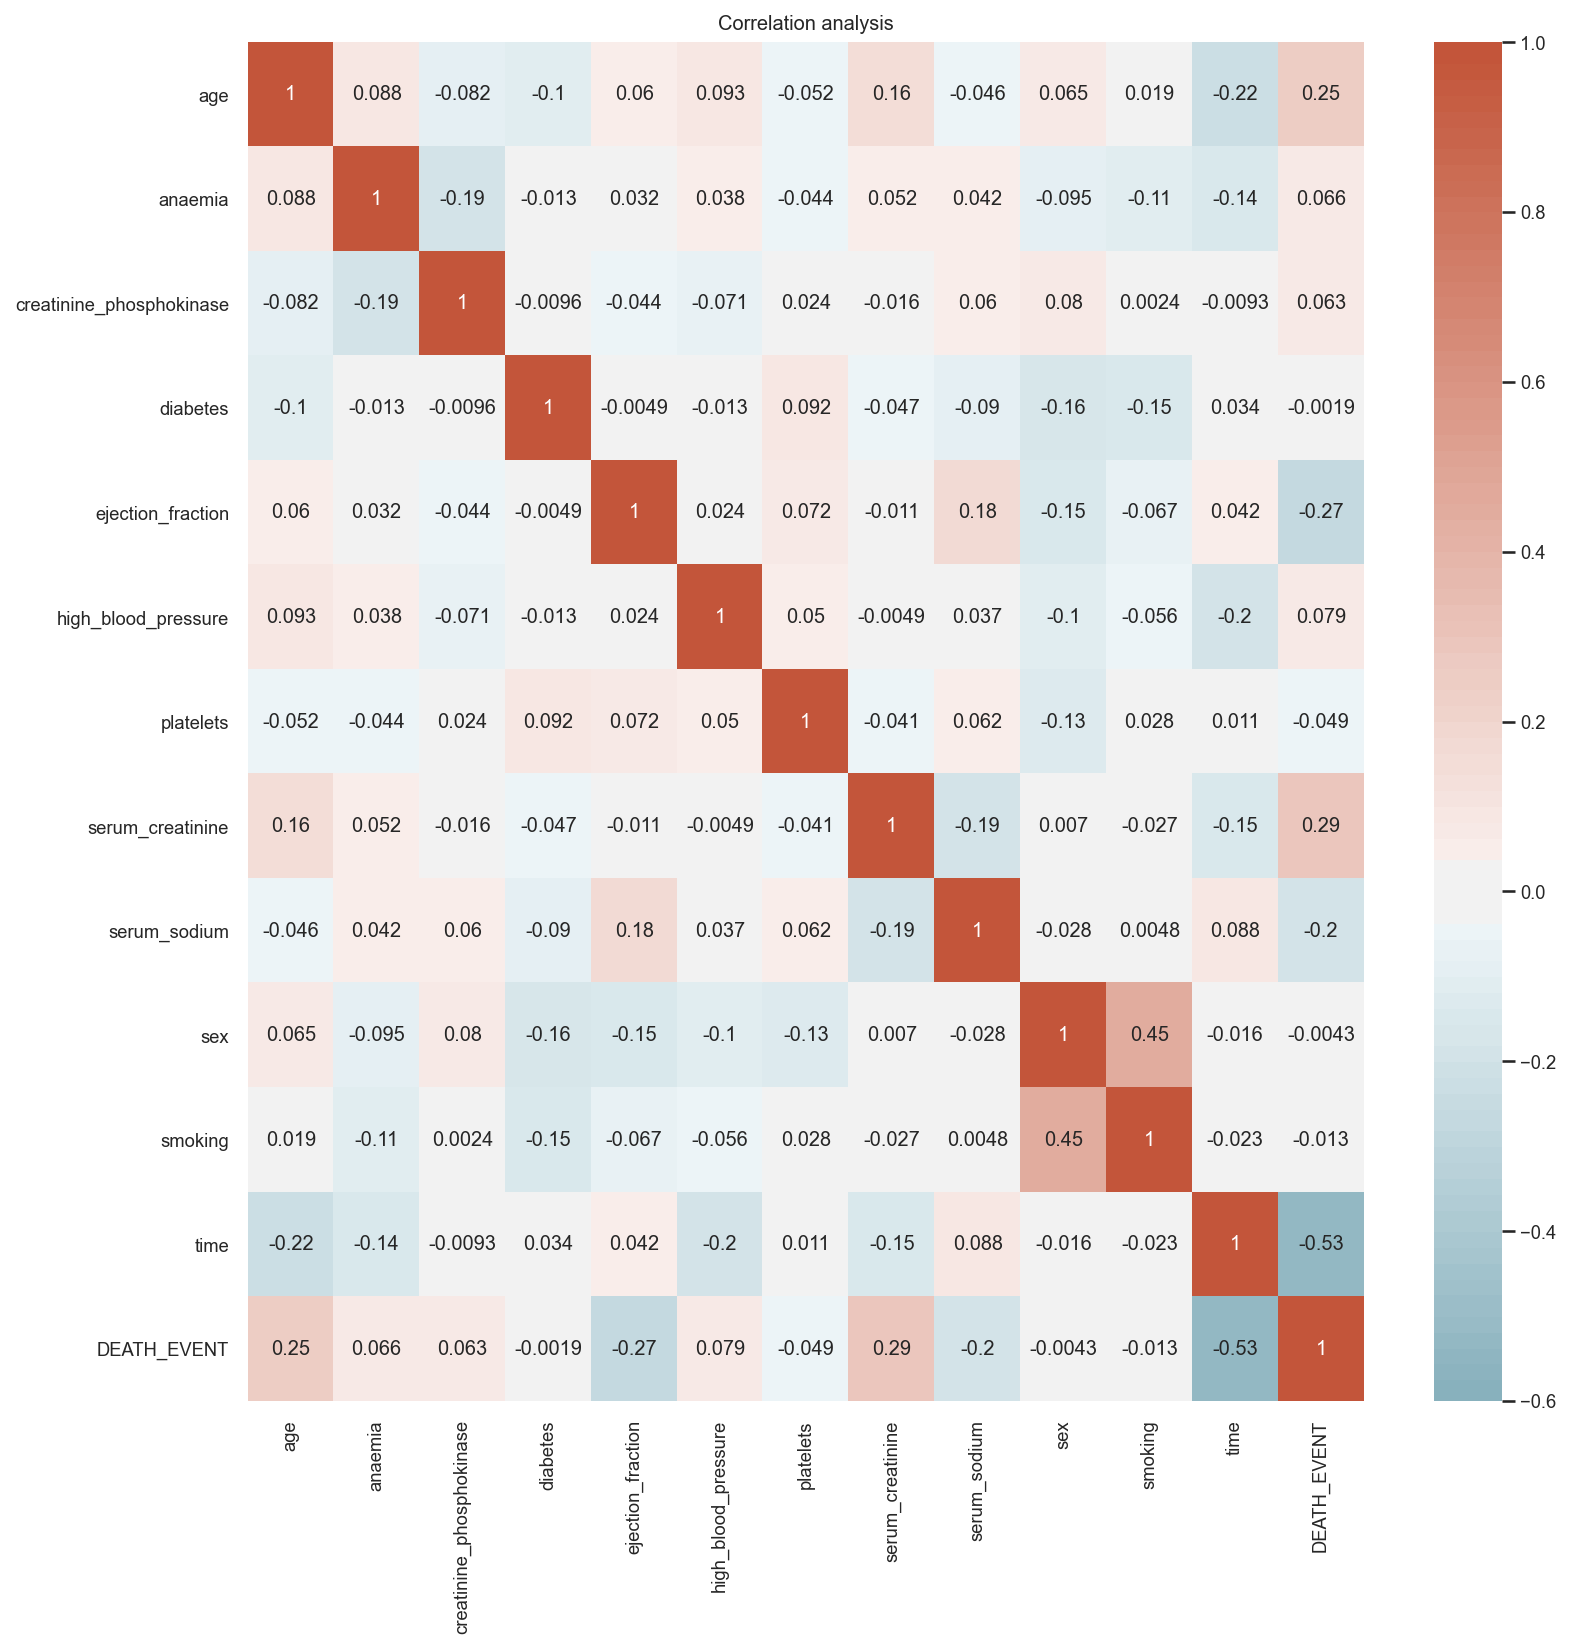

In [26]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = data.corr()
sns.set(font_scale=0.8) 
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns,center=0,vmin=-0.6, vmax=1, annot=True, cmap=sns.diverging_palette(220, 20, n=100))
plt.title('Correlation analysis')
plt.show()

# Dataset *qsar_oral_toxicity*

## Data Sparsity (For Sampled Variables)

<Figure size 600x450 with 0 Axes>

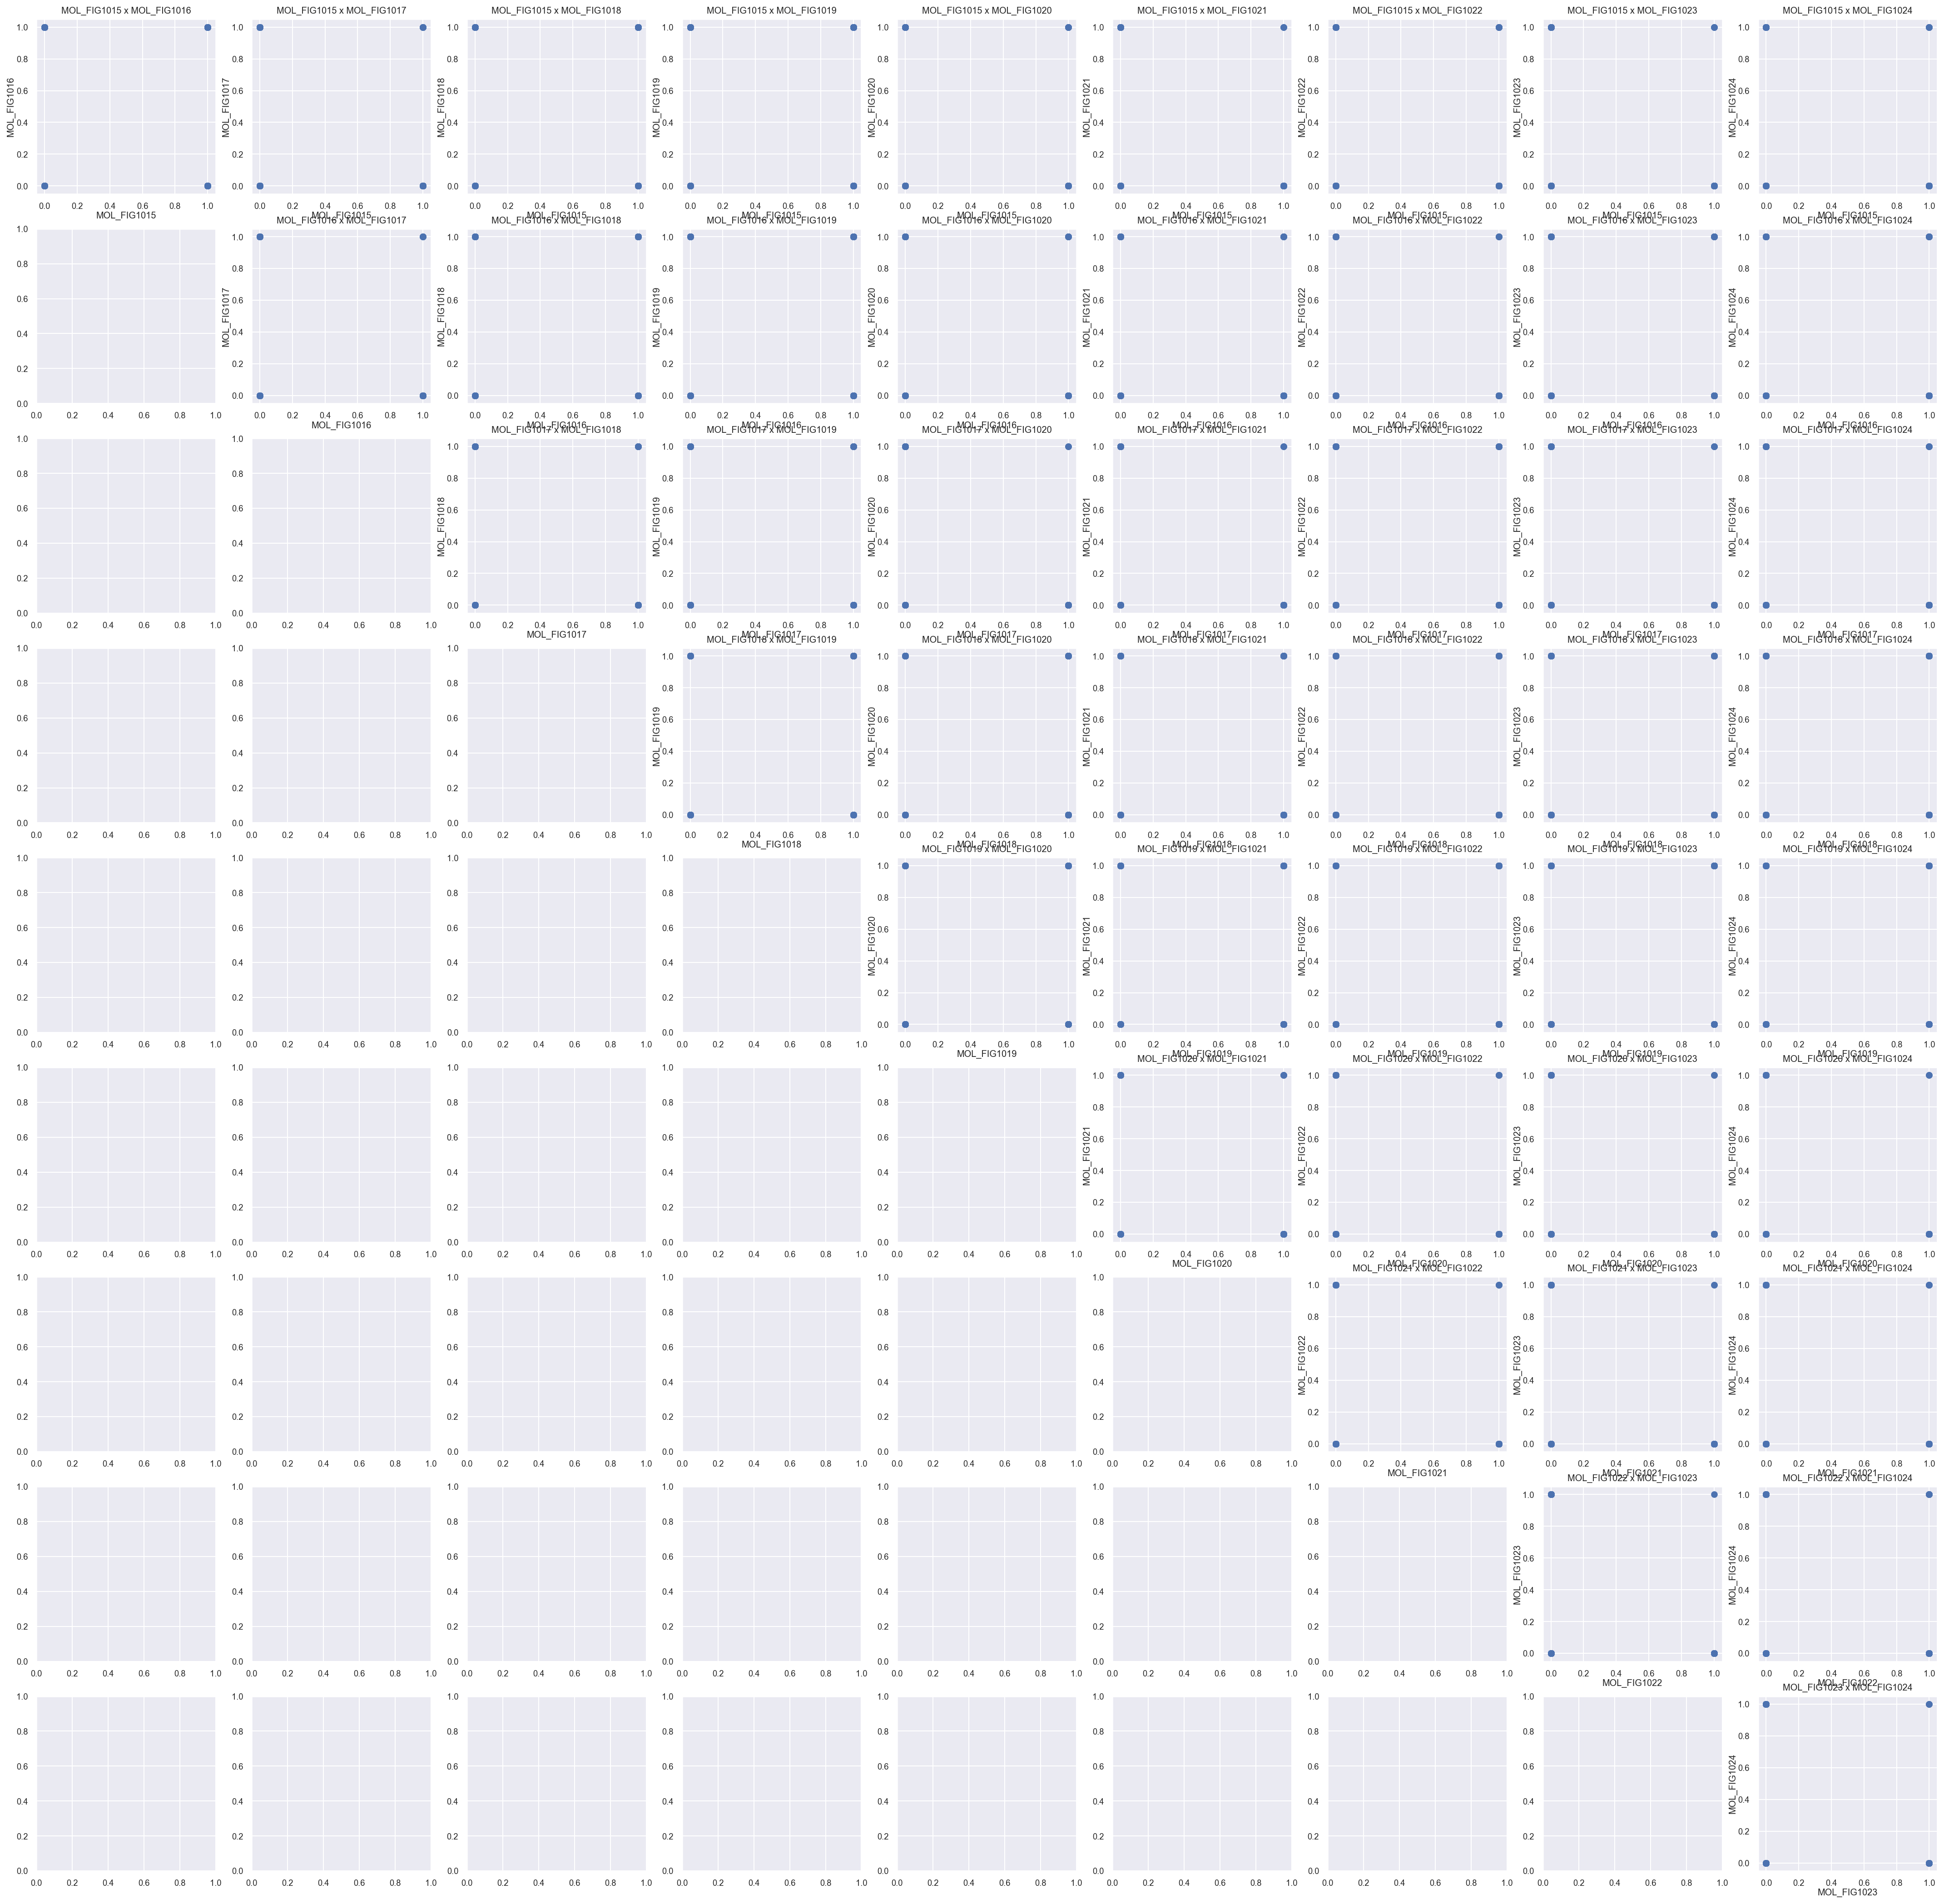

In [27]:
register_matplotlib_converters()
data = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv', parse_dates=True, infer_datetime_format=True)

for i in range(1,1015):
    data = data.drop('MOL_FIG'+ str(i), 1)
    
columns = data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
plt.show()

## Correlation Analysis (For Sampled Variables)

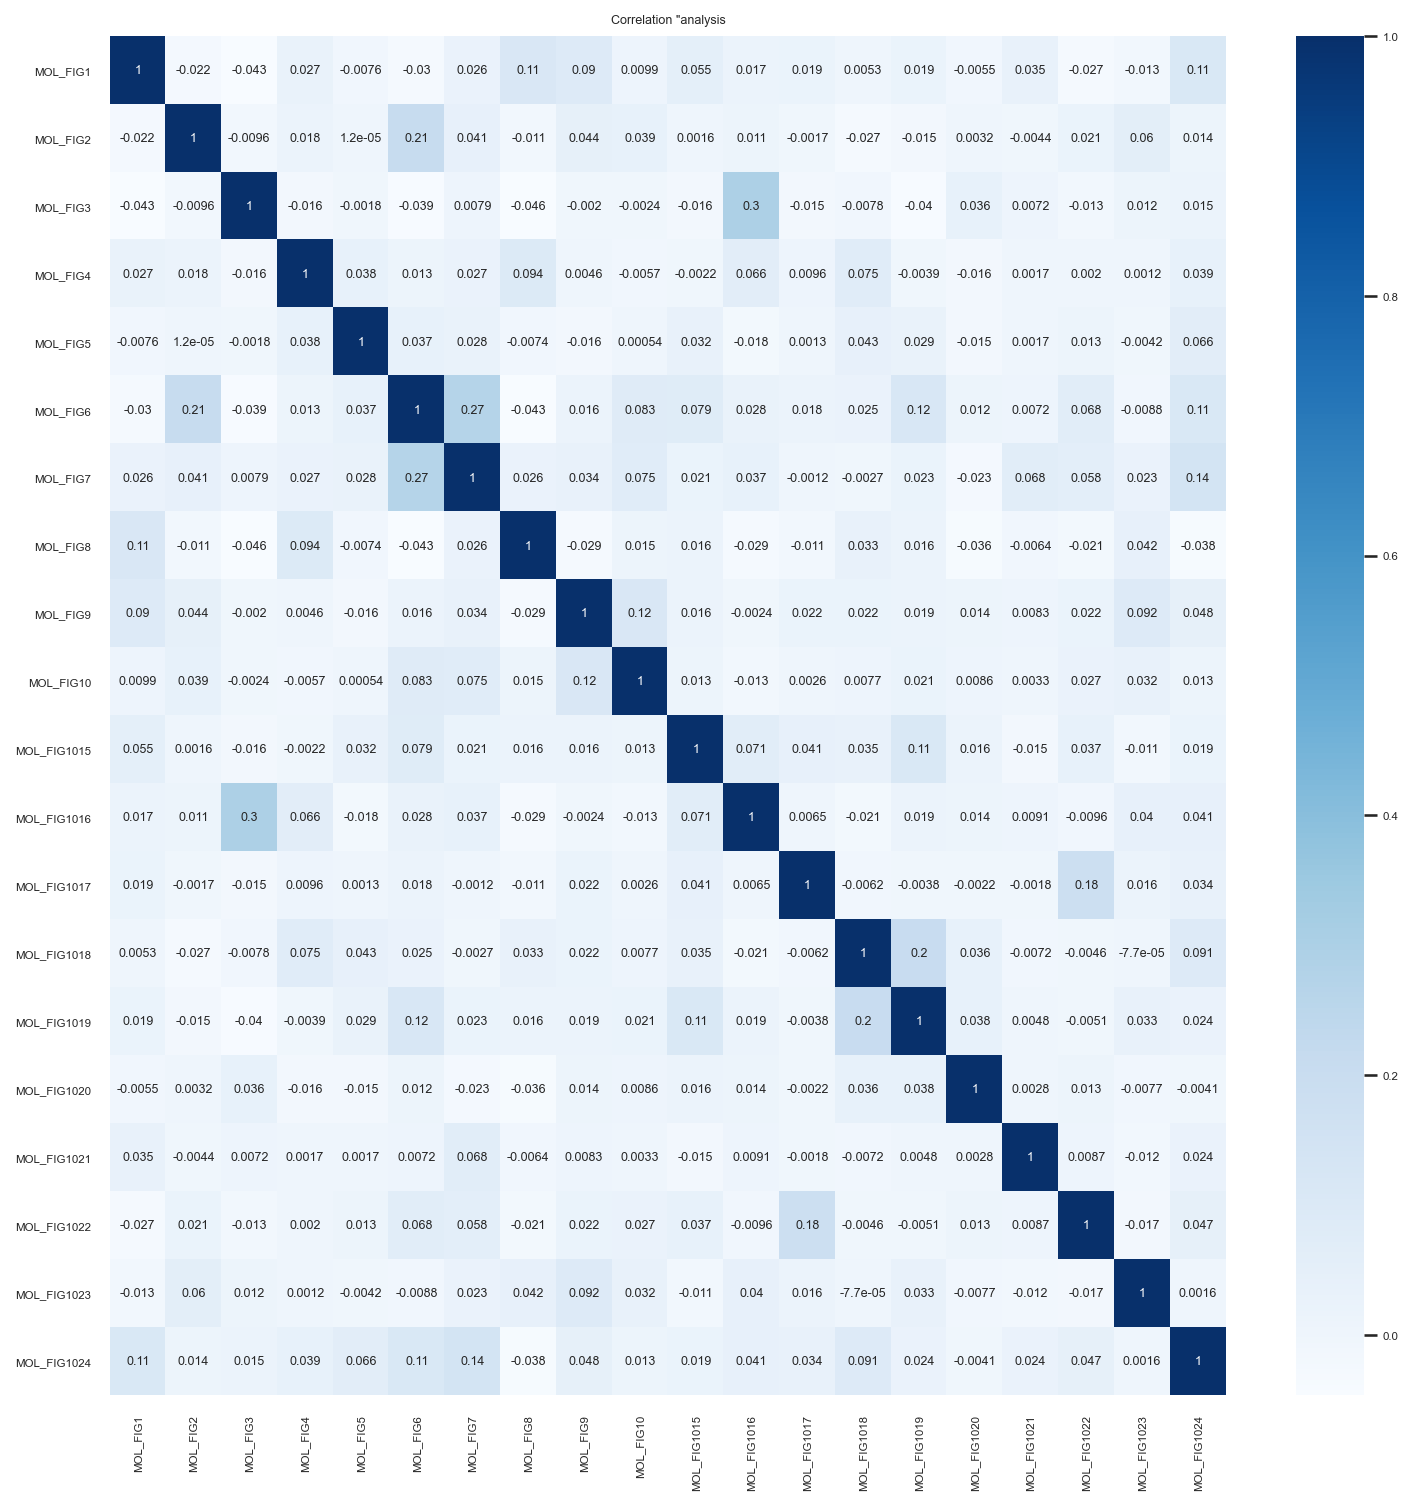

In [28]:
data = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv', parse_dates=True, infer_datetime_format=True)
for i in range(11,1015):
    data = data.drop('MOL_FIG'+ str(i), 1)

fig = plt.figure(figsize=[12, 12])
sns.set(font_scale=0.5) 
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation "analysis')
plt.show()

Although we cannot observe each single value we can conclude, from the shadow of blue of each square that there is no correlation between the sampled variables and therefore none of them is redundant. At least, not among this set.